### Importing libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

### Importing dataset

In [5]:
path = '/Users/maryrosejofelvillacampa/Desktop/datasets/exoplanets.csv'
df = pd.read_csv(path)
df = pd.DataFrame(df)

df = df[["pl_orbsmax", "pl_orbeccen", "st_mass", "st_teff", "pl_orbper"]]
df.columns =["semi-major axis", "eccentricity", "stellar mass", "stellar temperature", "orbital period"]
df.dropna(subset=["eccentricity"], inplace=True)
df

,semi-major axis,eccentricity,stellar mass,stellar temperature,orbital period
0,1.290000,0.23100,2.70,4742.0,326.030000
1,1.540000,0.08000,1.80,4340.0,516.220000
2,0.830000,0.00000,2.20,4813.0,185.840000
3,2.770000,0.36900,0.90,5311.0,1773.400000
4,1.681000,0.68100,0.99,5674.0,798.500000
...,...,...,...,...,...
3367,0.059222,0.02150,1.30,NaN,4.617033
3368,0.827774,0.25960,1.30,NaN,241.258000
3369,2.513290,0.29870,1.30,NaN,1276.460000
3370,5.245580,0.00536,1.30,NaN,3848.860000


### Dataset exploration

In [6]:
shape = df.shape
print(f"The dataset has a dimension of {shape[0]} rows and {shape[1]} columns.")

nulls = df.isnull().sum()
print("\nThe number of missing values per variable:")
print(nulls)

The dataset has a dimension of 974 rows and 5 columns.

The number of missing values per variable:
semi-major axis        53
eccentricity            0
stellar mass           41
stellar temperature    93
orbital period          0
dtype: int64


/Users/maryrosejofelvillacampa/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/maryrosejofelvillacampa/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/maryrosejofelvillacampa/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/maryrosejofelvillacampa/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

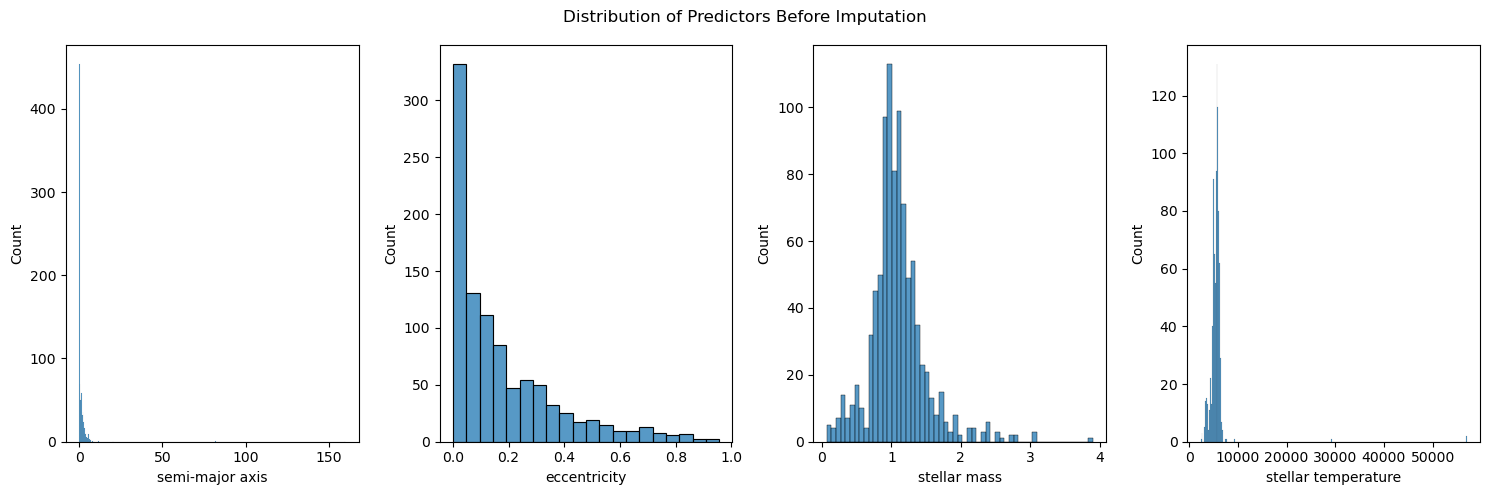

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(1,4,1)
sns.histplot(x=df["semi-major axis"])

plt.subplot(1,4,2)
sns.histplot(x=df["eccentricity"])

plt.subplot(1,4,3)
sns.histplot(x=df["stellar mass"])

plt.subplot(1,4,4)
sns.histplot(x=df["stellar temperature"])

plt.suptitle("Distribution of Predictors Before Imputation")
plt.tight_layout()
plt.show()

### Data cleaning

In [8]:
med_sma = df["semi-major axis"].median()
df["semi-major axis"] = df["semi-major axis"].fillna(med_sma)

med_sm = df["stellar mass"].median()
df["stellar mass"] = df["stellar mass"].fillna(med_sm)

med_st = df["stellar temperature"].median()
df["stellar temperature"] = df["stellar temperature"].fillna(med_st)

nulls = df.isnull().sum()
print("\nThe number of missing values per variable:")
print(nulls)


The number of missing values per variable:
semi-major axis        0
eccentricity           0
stellar mass           0
stellar temperature    0
orbital period         0
dtype: int64


/Users/maryrosejofelvillacampa/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/maryrosejofelvillacampa/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/maryrosejofelvillacampa/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/maryrosejofelvillacampa/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

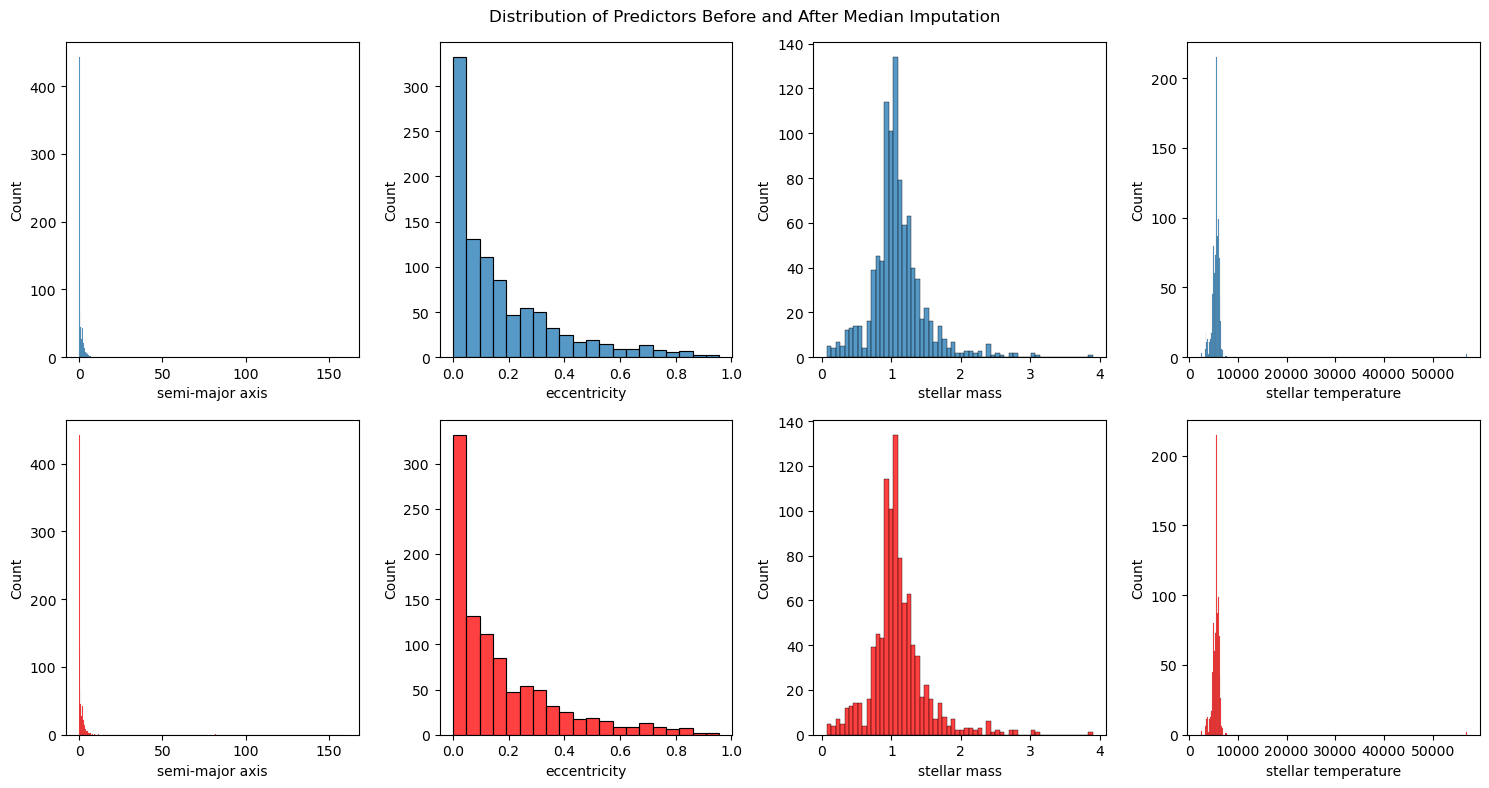

In [9]:
plt.figure(figsize=(15, 8))

plt.subplot(2,4,1)
sns.histplot(x=df["semi-major axis"])

plt.subplot(2,4,2)
sns.histplot(x=df["eccentricity"])

plt.subplot(2,4,3)
sns.histplot(x=df["stellar mass"])

plt.subplot(2,4,4)
sns.histplot(x=df["stellar temperature"])

plt.subplot(2,4,5)
sns.histplot(x=df["semi-major axis"], color='red')

plt.subplot(2,4,6)
sns.histplot(x=df["eccentricity"], color='red')

plt.subplot(2,4,7)
sns.histplot(x=df["stellar mass"], color='red')

plt.subplot(2,4,8)
sns.histplot(x=df["stellar temperature"], color='red')

plt.suptitle("Distribution of Predictors Before and After Median Imputation")
plt.tight_layout()
plt.show()

### Checking assumptions

In [10]:
#checking correlation values between predictors to assess multicollinearity
df_predictors = df[["semi-major axis", "eccentricity", "stellar mass", "stellar temperature"]]
df_predictors.corr()

,semi-major axis,eccentricity,stellar mass,stellar temperature
semi-major axis,1.000000,0.195680,0.129501,0.046027
eccentricity,0.195680,1.000000,0.028581,-0.003143
stellar mass,0.129501,0.028581,1.000000,0.013126
stellar temperature,0.046027,-0.003143,0.013126,1.000000


In [11]:
#performing Variance Inflation Factor to assess multicollinearity
#optional since correlation variables are already calculated

vif_data = pd.DataFrame()
vif_data["Feature"] = df_predictors.columns
vif_data["VIF"] = [variance_inflation_factor(df_predictors.values, i) for i in range(len(df_predictors.columns))]

print(vif_data)

               Feature       VIF
0      semi-major axis  1.093542
1         eccentricity  1.732976
2         stellar mass  4.045366
3  stellar temperature  3.808298


### Data processing

In [17]:
x_features = df[["semi-major axis", "eccentricity", "stellar mass", "stellar temperature"]]
y_features = df["orbital period"]

scaledx_data = scale.fit_transform(x_features)
scaledx_data = pd.DataFrame(scaledx_data, columns=["semi-major axis", "eccentricity", "stellar mass", "stellar temperature"])
scaledx_data

,semi-major axis,eccentricity,stellar mass,stellar temperature
0,0.006180,0.307643,4.021553,-0.318321
1,0.048437,-0.463887,1.768782,-0.475389
2,-0.071572,-0.872644,2.770013,-0.290581
3,0.256340,1.012750,-0.483988,-0.096004
4,0.072269,2.606904,-0.258711,0.045826
...,...,...,...,...
969,-0.201855,-0.762791,0.517243,0.007927
970,-0.071949,0.453774,0.517243,0.007927
971,0.212949,0.653554,0.517243,0.007927
972,0.674780,-0.845257,0.517243,0.007927
